In [15]:
from fetch_data import fetch_data
from candlestick import fetch_all_data
import pandas as pd
import plotly.express as px


In [16]:
df = fetch_all_data()

[*********************100%***********************]  30 of 30 completed


In [3]:
df.head()

,Date,Close_AAVE-USD,Close_ADA-USD,Close_ALGO-USD,Close_ATOM-USD,Close_AVAX-USD,Close_BCH-USD,Close_BNB-USD,Close_BTC-USD,Close_CHR-USD,Close_DASH-USD,Close_DOGE-USD,Close_DOT-USD,Close_EOS-USD,Close_ETC-USD,Close_ETH-USD,Close_FTT-USD,Close_LINK-USD,Close_LTC-USD,Close_NEO-USD,Close_PEPE24478-USD,Close_SOL-USD,Close_THETA-USD,Close_TRX-USD,Close_UNI-USD,Close_USDT-USD,Close_VET-USD,Close_WIF-USD,Close_XLM-USD,Close_XMR-USD,Close_XRP-USD,High_AAVE-USD,High_ADA-USD,High_ALGO-USD,High_ATOM-USD,High_AVAX-USD,High_BCH-USD,High_BNB-USD,High_BTC-USD,High_CHR-USD,...,Open_SOL-USD,Open_THETA-USD,Open_TRX-USD,Open_UNI-USD,Open_USDT-USD,Open_VET-USD,Open_WIF-USD,Open_XLM-USD,Open_XMR-USD,Open_XRP-USD,Volume_AAVE-USD,Volume_ADA-USD,Volume_ALGO-USD,Volume_ATOM-USD,Volume_AVAX-USD,Volume_BCH-USD,Volume_BNB-USD,Volume_BTC-USD,Volume_CHR-USD,Volume_DASH-USD,Volume_DOGE-USD,Volume_DOT-USD,Volume_EOS-USD,Volume_ETC-USD,Volume_ETH-USD,Volume_FTT-USD,Volume_LINK-USD,Volume_LTC-USD,Volume_NEO-USD,Volume_PEPE24478-USD,Volume_SOL-USD,Volume_THETA-USD,Volume_TRX-USD,Volume_UNI-USD,Volume_USDT-USD,Volume_VET-USD,Volume_WIF-USD,Volume_XLM-USD,Volume_XMR-USD,Volume_XRP-USD
0,2024-05-02,84.980095,0.458282,0.181256,8.651612,33.612564,429.969849,560.526733,59123.433594,0.270306,29.152054,0.132106,7.285116,0.817173,25.679646,2988.168457,1.493467,13.595815,80.122772,15.933504,0.000008,137.814484,2.045676,0.122292,0.000177,1.000053,0.035155,2.734267,0.110360,123.167778,0.518329,85.901871,0.461007,0.184157,9.041765,34.086025,434.045013,565.457397,59602.296875,0.275013,...,134.627975,2.037342,0.120330,0.000175,0.998584,0.035232,2.615513,0.111035,123.546432,0.516997,71496062,357372995,57425956,196329194,352653461,308029753,877449354,32711813559,8830091,35049366,1308884973,268770098,132851475,189463250,13163903903,19446594,267992086,313083456,81503748,1175780588,3380078368,49140176,352230934,32.0,54769809487,47564282,431302208,74766755,47242005,1118497654
1,2024-05-03,88.814995,0.467544,0.191979,8.768824,35.584896,453.345551,587.010437,62889.835938,0.282321,29.759146,0.146146,7.255101,0.828985,26.923174,3103.541992,1.512717,14.109475,81.930138,16.583763,0.000008,143.772552,2.184779,0.122766,0.000189,1.000547,0.037256,3.107465,0.111782,124.982780,0.531894,89.187347,0.472815,0.194279,8.915954,35.867378,457.933502,590.244812,63320.503906,0.286322,...,137.814484,2.045676,0.122292,0.000177,1.000053,0.035155,2.734267,0.110360,123.167778,0.518329,69381007,331867585,51707267,120970509,314837755,349672737,854728192,33172023048,7495790,38497181,1266276714,258847903,111764541,200281481,12862183229,12791556,259541877,306780202,65944875,1121183691,3216962298,39098980,275034834,34.0,53871028495,56741257,444766260,62383004,52444310,1138445190
2,2024-05-04,89.053757,0.463577,0.192794,8.694795,37.361832,463.508820,585.846558,63891.472656,0.277544,29.241491,0.160157,7.127060,0.817015,26.957998,3117.576416,1.495756,14.318272,81.687035,16.663961,0.000009,146.135056,2.174970,0.122322,0.000192,1.000148,0.037110,3.393611,0.111008,123.332260,0.530405,89.846954,0.474552,0.195946,8.836465,37.617813,478.906433,593.193420,64494.957031,0.285394,...,143.772202,2.184779,0.122765,0.000189,1.000555,0.037256,3.107465,0.111782,124.982780,0.531893,54854430,245730966,39991569,89993952,376360200,358128520,582273374,20620477992,6220999,31501022,2791346636,161650387,88862294,166307076,8283229638,8872285,235116388,252821970,61959548,1088251003,3050187811,33466740,224837130,35.0,39527945715,44470807,546978472,49329923,59402585,686389982
3,2024-05-05,90.078110,0.458334,0.196579,9.336216,37.401939,469.264282,592.140381,64031.132812,0.276074,29.196766,0.161068,7.306784,0.822861,27.681726,3137.249023,1.495151,14.375482,81.375572,16.716644,0.000009,145.713028,2.243965,0.121111,0.000192,1.000254,0.037347,3.217128,0.110962,134.418472,0.529784,90.192780,0.465201,0.199963,9.400411,37.934868,472.188507,594.995300,64610.890625,0.283930,...,146.135056,2.174970,0.122322,0.000192,1.000151,0.037110,3.393611,0.111008,1

In [6]:
symbol_1 = 'BTC-USD'
symbol_2 = 'ETH-USD'
# Create column names for closing prices
col1 = f'Close_{symbol_1}'
col2 = f'Close_{symbol_2}'


In [ ]:
def get_scatter(all_data_df: pd.DataFrame, symbol:str):
    symbol_1 = 'BTC-USD'
    symbol_2 = 'ETH-USD'
    # Create column names for closing prices
    col1 = f'Close_{symbol_1}'
    col2 = f'Close_{symbol_2}'
    # Create a scatter plot with trendline
    fig = px.scatter(
        df,
        x=col2,
        y=col1,
        title=f"{symbol_1} vs {symbol_2} Closing Prices",
        labels={col1: f"{symbol_1} Close Price", col2: f"{symbol_2} Close Price"},
        trendline="ols"  # Ordinary Least Squares trendline
    )
    fig.data[0].marker.color = 'blue'      # Points
    fig.data[1].line.color = 'red'         # Trendline
    fig.show()

In [12]:
# Create a function to filter crypto list and create close price histogram for selected coin
fig = px.histogram(
    df,
    x='Close_BTC-USD',
    nbins=50,  # You can adjust the number of bins
    title='Histogram of BTC-USD Close Prices',
    labels={'Close_BTC-USD': 'BTC-USD Close Price'},
    color_discrete_sequence=['blue'],  # Set bin color
)

fig.show()

In [14]:
# Create a bar chart of volume over time
import plotly.express as px

fig = px.bar(
    df,
    x='Date',
    y='Volume_BTC-USD',
    title='BTC-USD Volume Over Time',
    labels={'Volume_BTC-USD': 'Volume', 'Date': 'Date'},
    color_discrete_sequence=['blue']  # Bar color
)

fig.show()

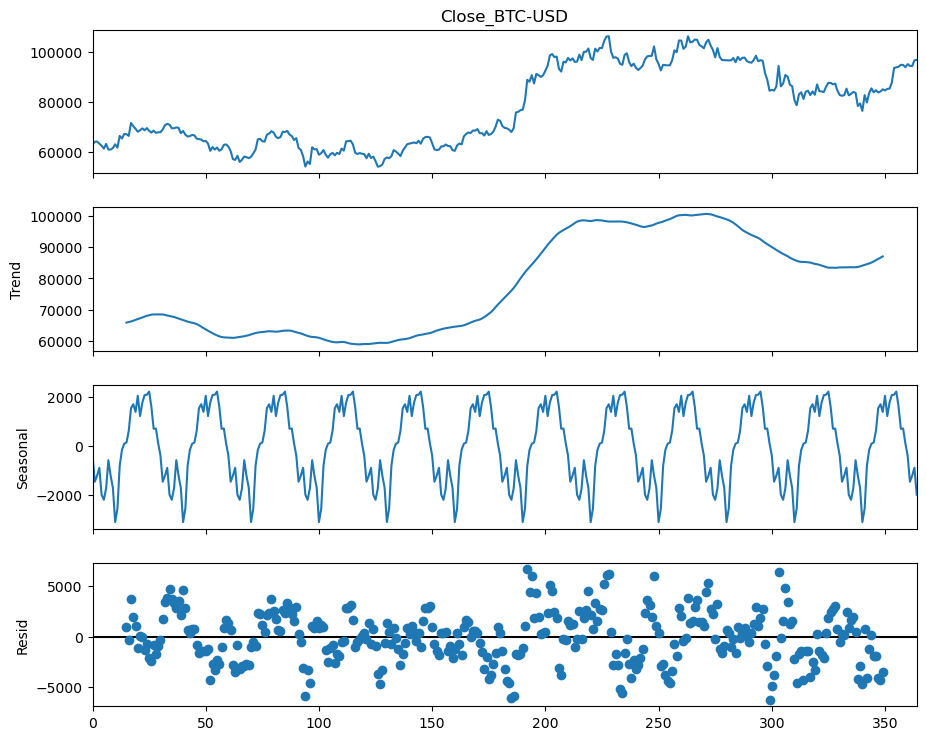

In [21]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib inline


# Decompose BTC-USD series
result = seasonal_decompose(df['Close_BTC-USD'], model='additive', period=30)  # assuming weekly seasonality

# Plot the decomposition
fig = result.plot()
fig.set_size_inches(10, 8)
#plt.tight_layout()
plt.show()